In [3]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [4]:
sbdf = pd.read_csv("../Data/superbowls.csv", encoding='utf-8')

In [5]:
df1 =  pd.DataFrame( columns=['Team'], dtype=str)
df2 =  pd.DataFrame( columns=['W','L'], dtype=int)
df = pd.concat([df1, df2], axis=1)

In [6]:
for index, row in sbdf.iterrows():
    # print row['c1'], row['c2']
    winner = row['Winner']
    loser= row['Loser']
    if winner in df['Team'].values:
        # update win count for team
        df.loc[df.Team == winner, 'W'] += 1
    else:
        # add new row        
        df = df.append({'Team': winner, 'W':1, 'L':0}, ignore_index=True)
        
    if loser in df['Team'].values:
        # update loss count for team
        df.loc[df.Team == loser, 'L'] += 1
    else:
        # add new row        
        df = df.append({'Team': loser, 'W':0, 'L':1}, ignore_index=True)

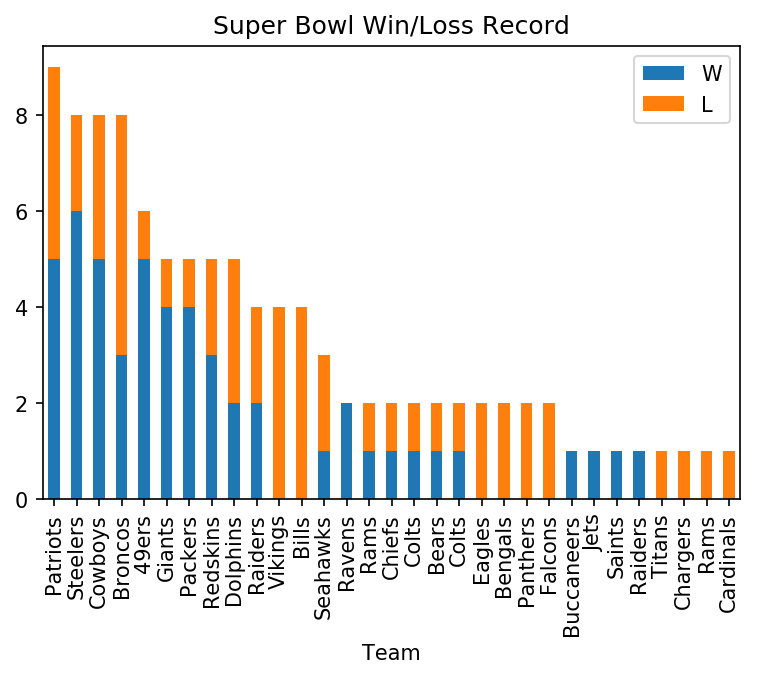

In [8]:
# Create a figure with one axes
fig, ax = plt.subplots(dpi=150)

# create a df with correctly sorted data
df['S'] = (df['W'] + df['L'])
dfx = df.sort_values(['S','W', 'L', 'Team'], ascending=False)[['Team', 'W','L']]
# Plot a stacked bar chart
dfx.plot.bar(ax=ax, stacked=True)
# Add axes labels using Matplotlib's API
ax.set_xlabel("Team")
ax.set_ylabel("") 
ax.set_xticklabels(dfx.Team.str.rsplit(' ', 1).str[1])  
ax.set_title('Super Bowl Win/Loss Record')